# Отбор признаков для моделий

Ссылка на лекцию https://www.youtube.com/watch?v=2yJSSgppLA0&t=1769s

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Методы основанные на корреляции

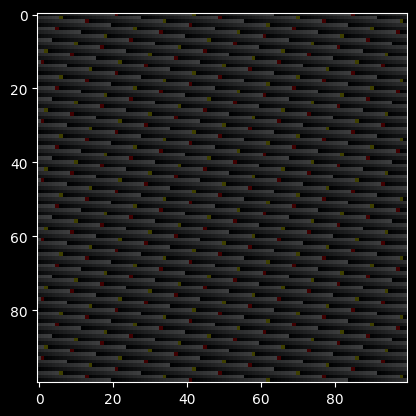

In [2]:
img = np.arange(100*100*3, dtype=int).reshape((100, 100, 3))
plt.imshow(img % 64)

## Алгоритмы полного перебора
- Осуществляют перебор всех комбинаций из 1, 2, ... N признаков.
- для каждой комбинации строится Фдель и оценивается метрика качества.
- Выбирается лучшая модель на основе метрики.
- По сравнению с предыдущими двумя подходами, данный подход наиболее
требователен к ресурсам.

для решения задачи используется класс ExhaustiveFeatureSelector из
библиотеки MLxtend.

## Методы основанные на статистических характеристиках

https://scikit-learn.ru/1-13-feature-selection/?ysclid=lvhy9kgrlk278349951

SelectKBest - выбирает К лучших признаков.    
SelectPercentile - выбирает К процентов лучших признаков    
В качестве функции выбирается:    
Для регрессии: f_regression, mutual_info_regression     
Для классификации: chi2, f_classif, mutual_info_classif

## Методы обертования

Используются методы машинного обучения для отбора признаков    
Методы обертования используют 'жадные алгоритмы' - прямые, обратные и полного перебора признаков    
Используется библиотека __MLxtend__ https://rasbt.github.io/mlxtend/https://rasbt.github.io/mlxtend/

In [ ]:
#%pip install mlxtend

__Sequential Feature Selector__    
- Sequential Forward Selection (SFS)    
- Sequential Backward Selection (SBS)     
- Sequential Forward Floating Selection (SFFS)    
- Sequential Backward Floating Selection (SBFS)    

In [24]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier


In [29]:
dataset = sns.load_dataset("iris")
iris_X = dataset.drop(columns=["species"])
iris_y = dataset["species"]
iris_feature_names = list(iris_X.columns)

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

In [26]:
efs1 = EFS(
    knn,
    min_features=2,
    max_features=4,
    scoring="accuracy",
    print_progress=True,
    cv=5,
)


In [28]:
efs1 = efs1.fit(iris_X, iris_y, custom_feature_names=iris_feature_names)

c:\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: KNeighborsClassifier.fit() got an unexpected keyword argument 'custom_feature_names'


In [5]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(knn,
           k_features=9,
           forward=True, # прямой и обратный перебор
           floating=False,
           verbose=2,
           scoring='f1',
           cv=0)

sfs1 = sfs1.fit(X, y)


[2024-05-04 09:57:23] Features: 1/9 -- score: 0.07472373267847746
[2024-05-04 09:57:32] Features: 2/9 -- score: 0.4059283655825443
[2024-05-04 09:57:42] Features: 3/9 -- score: 0.44719669729657746
[2024-05-04 09:57:50] Features: 4/9 -- score: 0.4648293963254593
[2024-05-04 09:58:00] Features: 5/9 -- score: 0.47770534550195565
[2024-05-04 09:58:09] Features: 6/9 -- score: 0.4882360587547121
[2024-05-04 09:58:17] Features: 7/9 -- score: 0.48862897985705
[2024-05-04 09:58:24] Features: 8/9 -- score: 0.48843855546895293
[2024-05-04 09:58:28] Features: 9/9 -- score: 0.48810916179337227

In [ ]:
sfs1.subsets_

{1: {'feature_idx': (6,),
  'cv_scores': array([0.07472373]),
  'avg_score': 0.07472373267847746,
  'feature_names': ('logsumabs_1',)},
 2: {'feature_idx': (0, 6),
  'cv_scores': array([0.40592837]),
  'avg_score': 0.4059283655825443,
  'feature_names': ('time', 'logsumabs_1')},
 3: {'feature_idx': (0, 2, 6),
  'cv_scores': array([0.4471967]),
  'avg_score': 0.44719669729657746,
  'feature_names': ('time', 'employee_count_nm', 'logsumabs_1')},
 4: {'feature_idx': (0, 2, 5, 6),
  'cv_scores': array([0.4648294]),
  'avg_score': 0.4648293963254593,
  'feature_names': ('time',
   'employee_count_nm',
   'logsumabs_0',
   'logsumabs_1')},
 5: {'feature_idx': (0, 1, 2, 5, 6),
  'cv_scores': array([0.47770535]),
  'avg_score': 0.47770534550195565,
  'feature_names': ('time',
   'customer_age',
   'employee_count_nm',
   'logsumabs_0',
   'logsumabs_1')},
 6: {'feature_idx': (0, 1, 2, 4, 5, 6),
  'cv_scores': array([0.48823606]),
  'avg_score': 0.4882360587547121,
  'feature_names': ('time',
 

__ExhaustiveFeatureSelector - полный перебор__

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

knn = KNeighborsClassifier(n_neighbors=3)

efs1 = EFS(knn,
           min_features=1,
           max_features=9,
           scoring='f1',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(X, y)


Features: 511/511

In [ ]:
print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Best accuracy score: 0.37
Best subset (indices): (0, 1, 2, 3, 4, 5, 6)
Best subset (corresponding names): ('time', 'customer_age', 'employee_count_nm', 'bankemplstatus', 'report', 'logsumabs_0', 'logsumabs_1')


## Методы вложения

__Модели для оценки важности признаков:__    
- Линейные модели.
- Метод опорных векторов с l1-регулирезацией.    
- Дерево решений.
- Ассамблевые модели на основе деревьев решений.

SelectFromModel - можно пременить для выбора признаков

In [ ]:
from sklearn.feature_selection import SelectFromModel

### Логистическая регрессия

In [ ]:
#%pip install shap

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import auc, f1_score, classification_report

In [ ]:
# Используем L1-регуляризацию
model = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(C=1000, max_iter=1000, penalty='l1', solver='liblinear')

In [ ]:
model.coef_

array([[-0.0547124 , -0.17118667, -0.21804785, -8.90202108, -0.03960441,
         0.04180159, -0.05315739, -0.11927922,  0.0133169 ]])

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     11717
           1       0.55      0.29      0.38      1083

    accuracy                           0.92     12800
   macro avg       0.74      0.63      0.67     12800
weighted avg       0.90      0.92      0.91     12800



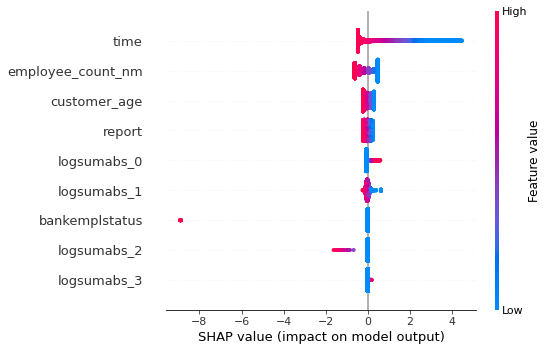

In [ ]:
import shap
explainer = shap.LinearExplainer(model, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### Линейный классификатор на основе SVM

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
model = LinearSVC(C=0.01, penalty='l1', max_iter=2000, dual=False)

### Дерево решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [ ]:
model = DecisionTreeClassifier()

### Ассамблевые модели на основе деревьев решений

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

## Гибридные методы

### Рекурсивное добавление и удаление признаков

Recursive Feature Addition.   
Recursive Feature Eliminftion

### Определения важности признаков на основе перемешевания данных

Permuation feature imporance    
Feature selection by random shuffling

In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
X = [[1, 9, 9],[1, 9, 9],[1, 9, 9],
     [0, 9, 9],[0, 9, 9],[0, 9, 9]]
y = [1, 1, 1, 0, 0, 0]
clf = LogisticRegression().fit(X, y)
result = permutation_importance(clf, X, y, n_repeats=10,
                                random_state=0)
print(result.importances_mean)
print(result.importances_std)

[0.46666667 0.         0.        ]
[0.22110832 0.         0.        ]
